# eBurnout Pattern analysis in the real dataset using GGPLOT

In [1]:
# eBurnout real Dataset of doctors from Infanta Sofia and Son Llatzer hospitals.
# Created by Jesús García García - Master´s Degree in Big Data Analytics UEM

## Load Data

In [2]:
#Import these libraries to read and process csv Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import ggplot library
from ggplot import *
#Import plotnine package, which facilitates the creation of highly-informative plots of structured data based on the R implementation of ggplot2
import plotnine as p9


import sys
sys._enablelegacywindowsfsencoding()
%matplotlib inline
dataset_path = r"C:\Users\Jesús García\Desktop\TFM\eBurnout_DatasetReal17072018.csv"
df = pd.read_csv(dataset_path,  error_bad_lines=False)

#Sort df by user id
#df.sort_values("usuario", inplace=True)
#Show dataset head
df.head()

C:\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
b'Skipping line 8: expected 35 fields, saw 36\nSkipping line 23: expected 35 fields, saw 36\n'


,email,usuario,hospital,edad,especialidad,estado civil,sexo,tipo contrato,tipo trabajo,tiempo vida laboral,...,wake,heart_max (0),heart_min(0),heart_max (1),heart_min(1),heart_max (2),heart_min(2),heart_max (3),heart_min(3),burnout
0,uemusuario2@gmail.com,1,Son Llatzer,30-34,Anestesiologia y Reanimacion,soltero,hombre,adjunto,hospitalario,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
1,uemusuario5@gmail.com,4,Infanta Sofia,30-34,Anatomia Patologica,soltero,hombre,residente,urgencias,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2,uemusuario14@gmail.com,5,Infanta Sofia,35-39,Psiquiatria,casado,mujer,adjunto,hospitalario,10.0,...,NaN,92.0,30.0,128.0,92.0,156.0,128.0,220.0,156.0,SÍ
3,hs1@g.com,6,Infanta Sofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
4,uemusuario13@gmail.com,10,Infanta Sofia,50-54,Psiquiatria,casado,mujer,adjunto,ambulatorio,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


## Exploratory Data Analysis

In [3]:
#Change Hospital, Burnout, Especialidad and more names to id for processing data
df['hospital'] = df['hospital'].replace(['Son Llatzer', 'Infanta Sofia'],[1, 2])
df['burnout'] = df['burnout'].replace(['SÍ', 'NO'],[1, 0])
df['sexo'] = df['sexo'].replace(['hombre', 'mujer'],[1, 2])
df['estado civil'] = df['estado civil'].replace(['soltero', 'casado','divorciado'],[1, 2,3])
df['ejercicio'] = df['ejercicio'].replace(['nunca', 'ocasionalmente','habitualmente'],[0, 1, 2])
df['edad'] = df['edad'].replace(['20-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69'],[20.24, 25.29, 30.34,35.39,40.44,45.49,50.54,55.59,60.64,65.69])
#We consider all especialidad attributes in eBurnout application
df['especialidad']= df['especialidad'].replace(['Analisis Clinicos','Anatomia Patologica','Anestesiologia y Reanimacion','Angiologia y Cirugia Vascular','Medicina Familiar y Comunitaria','Medicina Interna','Neumologia','Otros','Psiquiatria'],[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9])

In [4]:
df.head()

,email,usuario,hospital,edad,especialidad,estado civil,sexo,tipo contrato,tipo trabajo,tiempo vida laboral,...,wake,heart_max (0),heart_min(0),heart_max (1),heart_min(1),heart_max (2),heart_min(2),heart_max (3),heart_min(3),burnout
0,uemusuario2@gmail.com,1,1.0,30.34,3.0,1.0,1.0,adjunto,hospitalario,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,uemusuario5@gmail.com,4,2.0,30.34,2.0,1.0,1.0,residente,urgencias,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,uemusuario14@gmail.com,5,2.0,35.39,9.0,2.0,2.0,adjunto,hospitalario,10.0,...,NaN,92.0,30.0,128.0,92.0,156.0,128.0,220.0,156.0,1
3,hs1@g.com,6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,uemusuario13@gmail.com,10,2.0,50.54,9.0,2.0,2.0,adjunto,ambulatorio,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 35 columns):
email                  72 non-null object
usuario                72 non-null int64
hospital               70 non-null float64
edad                   69 non-null float64
especialidad           69 non-null float64
estado civil           69 non-null float64
sexo                   69 non-null float64
tipo contrato          69 non-null object
tipo trabajo           69 non-null object
tiempo vida laboral    69 non-null float64
tiempo plaza actual    69 non-null float64
altura                 69 non-null float64
peso                   69 non-null float64
ejercicio              69 non-null float64
consent                71 non-null float64
free text survey       71 non-null object
ae                     68 non-null float64
d                      68 non-null float64
rp                     68 non-null float64
duration_sleep         13 non-null float64
efficiency_sleep       13 non-null float64


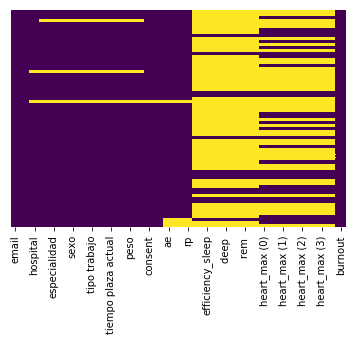

In [6]:
# Check missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

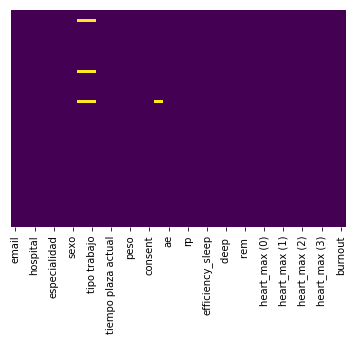

In [7]:
# Replace the missing values with the average value
df = df.fillna(df.mean())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Plot Data

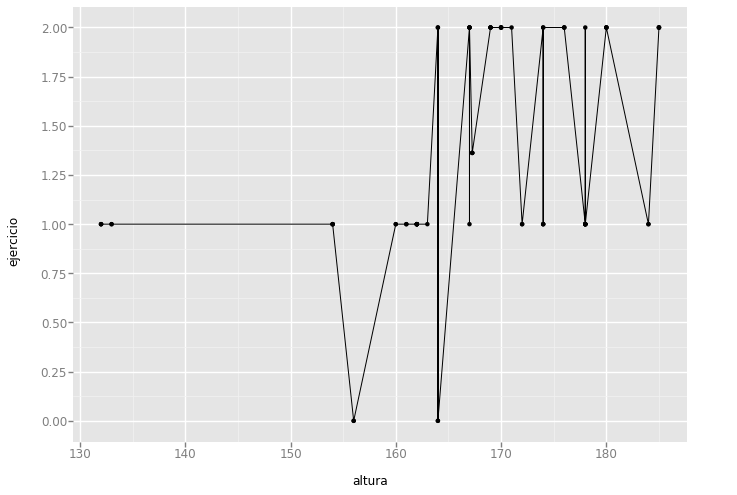

<ggplot: (-9223371907214750506)>

In [8]:
#Altura vs ejercicio
p = ggplot(aes(x='altura', y='ejercicio'), data=df)
p + geom_point() + geom_line() 

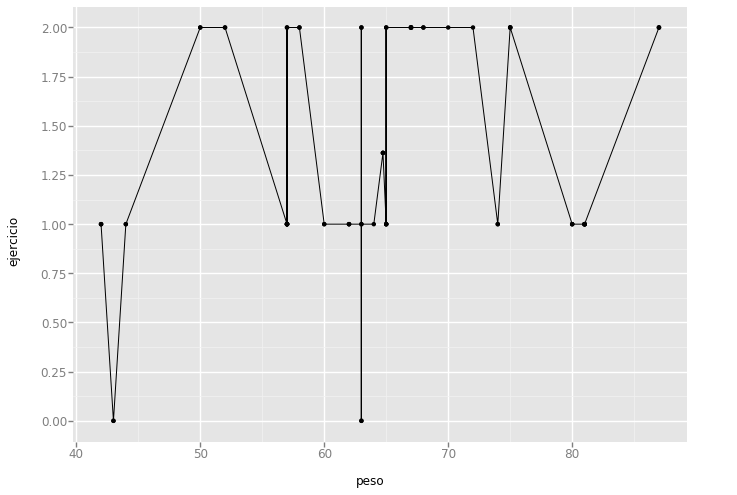

<ggplot: (-9223371907214818851)>

In [9]:
#Peso vs ejercicio
p = ggplot(aes(x='peso', y='ejercicio'), data=df)
p + geom_point() + geom_line() 

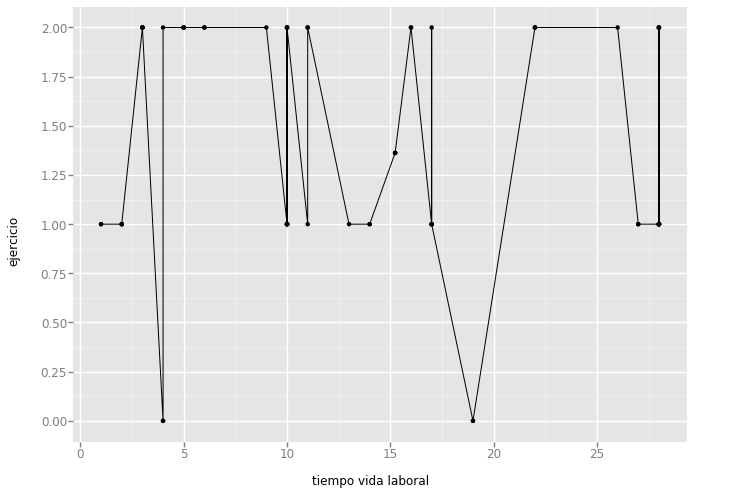

<ggplot: (129640322929)>

In [10]:
#Tiempo vida laboral vs ejercicio
p = ggplot(aes(x='tiempo vida laboral', y='ejercicio'), data=df)
p + geom_point() + geom_line() 

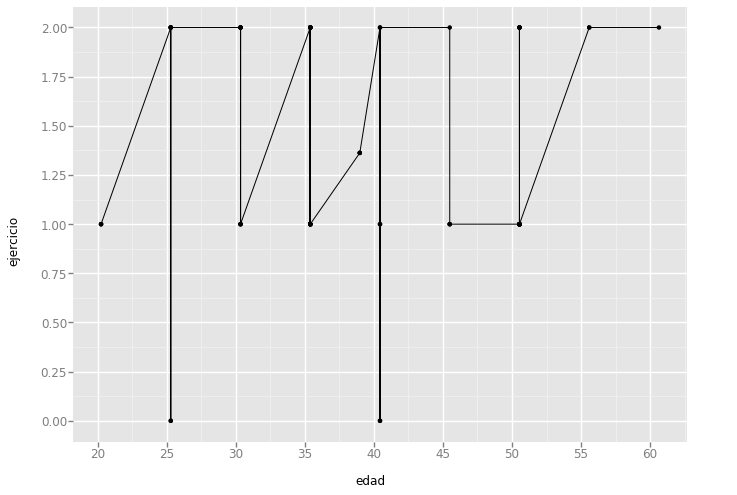

<ggplot: (129639952234)>

In [11]:
#Edad vs ejercicio
p = ggplot(aes(x='edad', y='ejercicio'), data=df)
p + geom_point() + geom_line() 

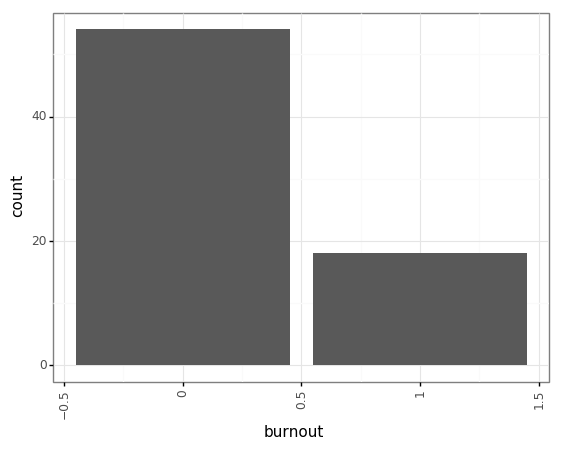

<ggplot: (129640352036)>

In [12]:
#Check total burnout
(p9.ggplot(data=df,
           mapping=p9.aes(x='burnout'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

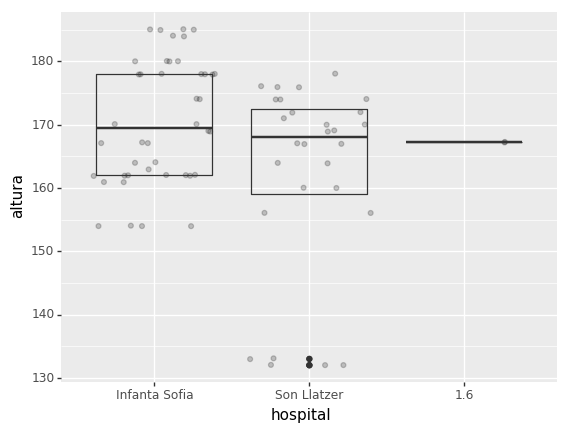

<ggplot: (-9223371907219982469)>

In [13]:
#Visualising distributions
df['hospital'] = df['hospital'].replace([1,2],['Son Llatzer', 'Infanta Sofia'])
(p9.ggplot(data=df,
           mapping=p9.aes(x='hospital',
                          y='altura'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
)

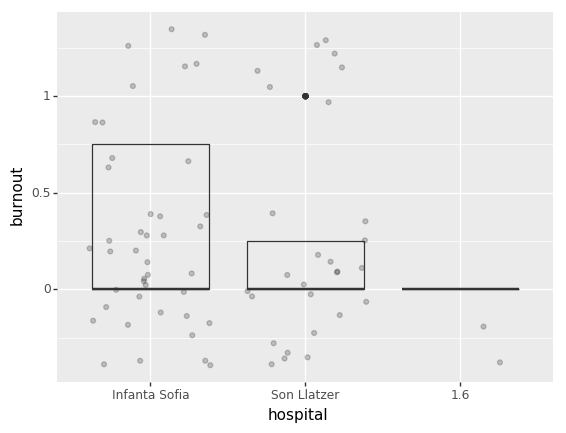

<ggplot: (-9223371907214104404)>

In [14]:
(p9.ggplot(data=df,
           mapping=p9.aes(x='hospital',
                          y='burnout'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
)

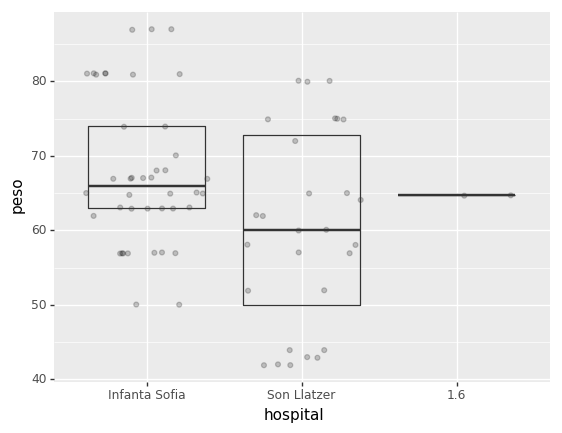

<ggplot: (129640725210)>

In [15]:
(p9.ggplot(data=df,
           mapping=p9.aes(x='hospital',
                          y='peso'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
)

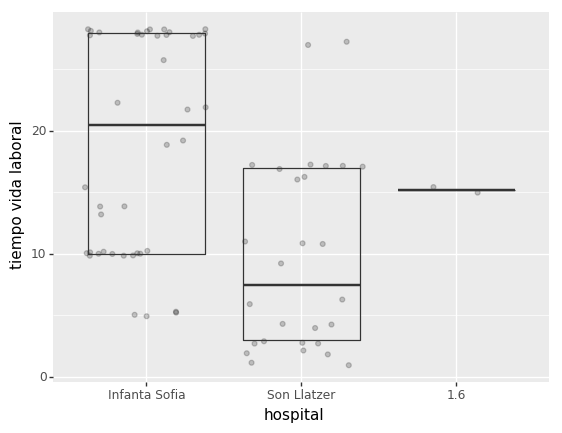

<ggplot: (129640099013)>

In [16]:
(p9.ggplot(data=df,
           mapping=p9.aes(x='hospital',
                          y='tiempo vida laboral'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
)

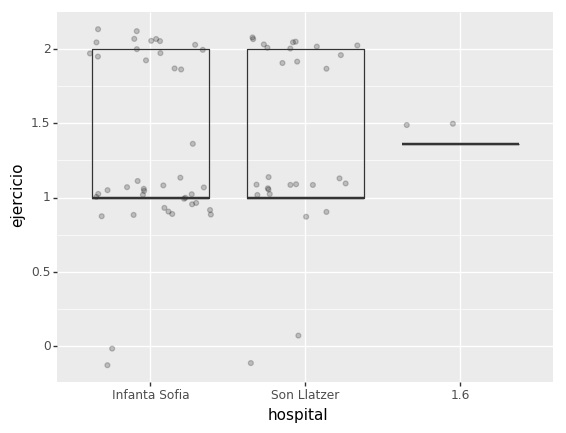

<ggplot: (-9223371907214077927)>

In [17]:
(p9.ggplot(data=df,
           mapping=p9.aes(x='hospital',
                          y='ejercicio'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
)

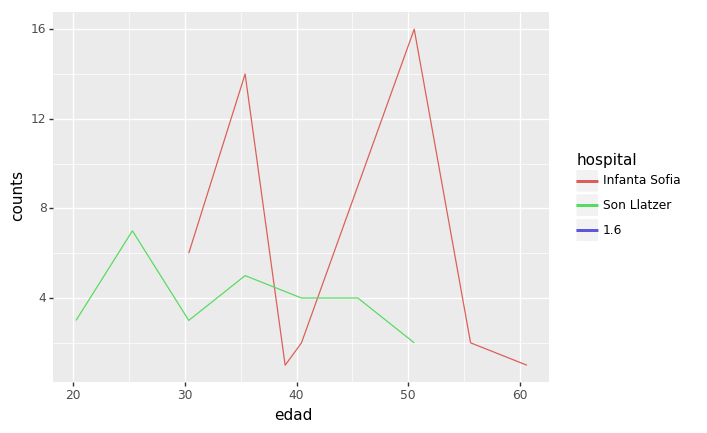

<ggplot: (129640900521)>

In [18]:
#Visualising time series data
age_counts = df.groupby(['edad', 'hospital'])['hospital'].count()
age_counts = age_counts.reset_index(name='counts')
(p9.ggplot(data=age_counts,
           mapping=p9.aes(x='edad',
                          y='counts',
                          color='hospital'))
    + p9.geom_line()
)

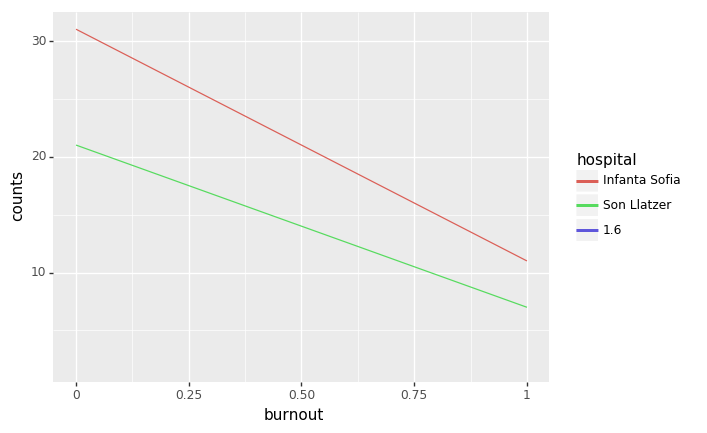

<ggplot: (-9223371907213790695)>

In [19]:
burnout_counts = df.groupby(['burnout', 'hospital'])['hospital'].count()
burnout_counts = burnout_counts.reset_index(name='counts')
(p9.ggplot(data=burnout_counts,
           mapping=p9.aes(x='burnout',
                          y='counts',
                          color='hospital'))
    + p9.geom_line()
)

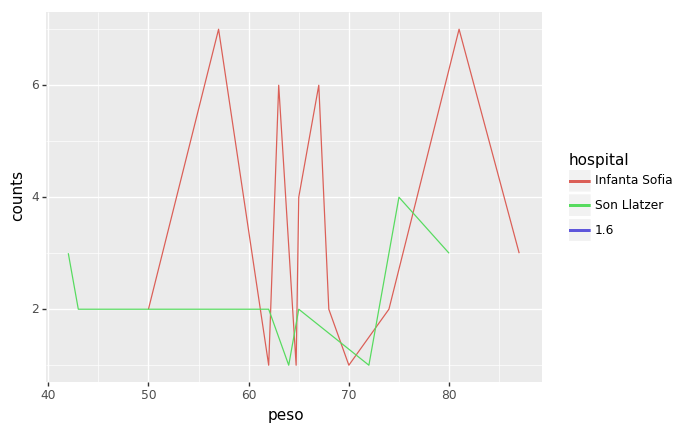

<ggplot: (-9223371907213706352)>

In [20]:
weight_counts = df.groupby(['peso', 'hospital'])['hospital'].count()
weight_counts = weight_counts.reset_index(name='counts')
(p9.ggplot(data=weight_counts,
           mapping=p9.aes(x='peso',
                          y='counts',
                          color='hospital'))
    + p9.geom_line()
)

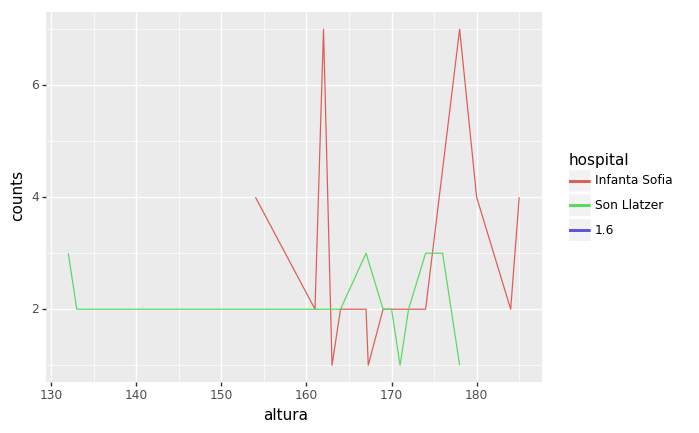

<ggplot: (129641049797)>

In [21]:
height_counts = df.groupby(['altura', 'hospital'])['hospital'].count()
height_counts = height_counts.reset_index(name='counts')
(p9.ggplot(data=height_counts,
           mapping=p9.aes(x='altura',
                          y='counts',
                          color='hospital'))
    + p9.geom_line()
)

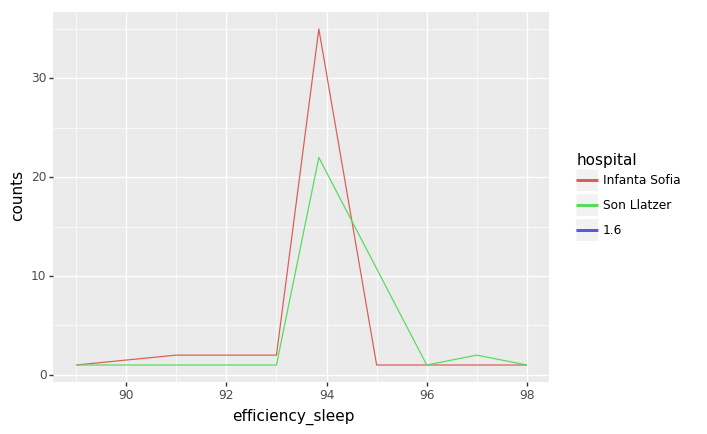

<ggplot: (-9223371907213636124)>

In [22]:
sleep_counts = df.groupby(['efficiency_sleep', 'hospital'])['hospital'].count()
sleep_counts = sleep_counts.reset_index(name='counts')
(p9.ggplot(data=sleep_counts,
           mapping=p9.aes(x='efficiency_sleep',
                          y='counts',
                          color='hospital'))
    + p9.geom_line()
)